In [1]:
%matplotlib notebook

In [ ]:
from mocpy import TimeMOC
from astropy.time import Time, TimeDelta
from astroquery.vizier import Vizier

### Loading a TimeMoc from a fits file

<IPython.core.display.Javascript object>


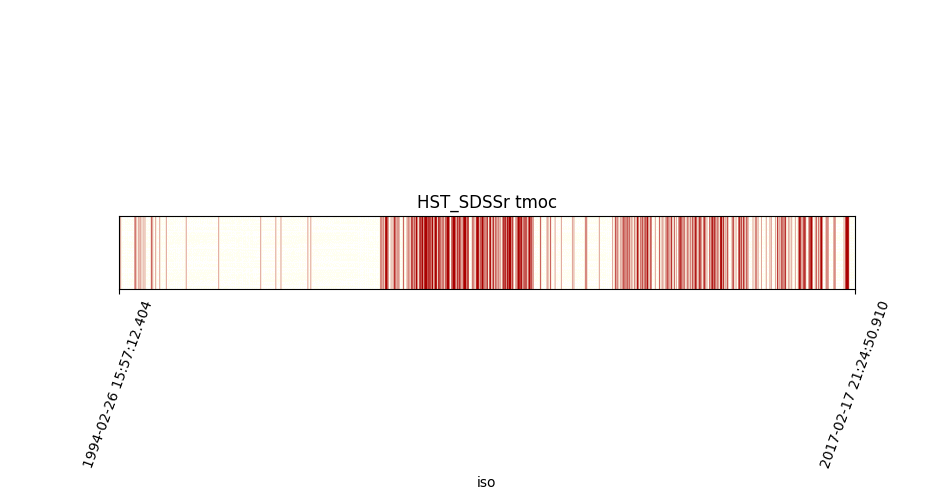

In [2]:
time_moc = TimeMOC.from_fits(
    "http://alasky.u-strasbg.fr/HST-hips/filter_SDSSr_hips/TMoc.fits"
)
time_moc.plot(title="HST_SDSSr tmoc")

### Loading a TimeMoc from an astropy table

In [3]:
viz = Vizier(columns=["*", "_RAJ2000", "_DEJ2000"])
viz.ROW_LIMIT = -1
table = viz.get_catalogs("II/285")[1]

print(table)

 Name  Ref      JD       Vmag  U-B  B-V    V-Rc  Rc-Ic  V-Ic 
                d        mag   mag  mag    mag    mag   mag  
------ --- ------------ ------ --- ------ ------ ----- ------
 T ANT 978 2443914.3750     --  --  0.802  0.391    --  0.856
 T ANT 978 2443915.4410     --  --  0.861  0.460    --  0.803
 T ANT 978 2444297.4250  9.360  --  0.791  0.431    --  0.840
 T ANT 978 2444298.4760  9.520  --  0.853  0.463    --  0.903
 T ANT 978 2444299.4940  9.720  --  0.927  0.484    --  0.953
 T ANT 978 2444300.4070  9.575  --  0.809  0.441    --  0.872
 T ANT 978 2444301.4180  8.881  --  0.499  0.309    --  0.608
 T ANT 978 2444302.4110  9.139  --  0.661  0.392    --  0.754
 T ANT 976 2451619.3105  9.738  --  0.910     --    --  0.959
 T ANT 976 2451619.3828     --  --     --     --    --  0.974
   ... ...          ...    ... ...    ...    ...   ...    ...
NN VUL 950 2445204.2187 14.102  --  1.372     --    --     --
NN VUL 950 2445205.2265 14.075  --  1.423     --    --     --
NN VUL 9

CPU times: user 296 ms, sys: 0 ns, total: 296 ms
Wall time: 300 ms


<IPython.core.display.Javascript object>


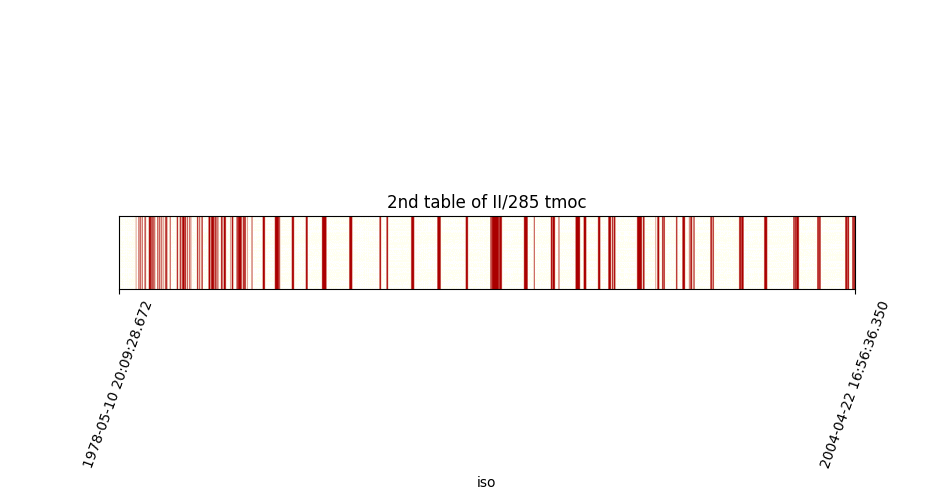

Time of the first observation: 1978-05-10 20:09:28.672
Time of the last observation: 2004-04-22 16:56:36.350
Total duration: 227.42448355555555 jd
max order: 14


In [4]:
%%time
table_moc = TimeMOC.from_times(Time(table["JD"], format="jd", scale="tdb"))
table_moc.plot(title="2nd table of II/285 tmoc")

# print characteristics such as the time of the first/last observations
print("Time of the first observation:", table_moc.min_time.iso)
print("Time of the last observation:", table_moc.max_time.iso)
# the total duration of the observation times
print("Total duration: {0} jd".format(table_moc.total_duration.jd))
# the order of the TimeMoc
print("max order:", table_moc.max_order)

### Filtering an astropy table with a TimeMoc

In [5]:
# filtering the table through the tmoc created from the HST_SDSSr fits file
rows = time_moc.contains(
    times=Time(table["JD"], format="jd", scale="tdb"),
    keep_inside=True,
    delta_t=TimeDelta(3600, format="sec", scale="tdb"),
)
print(table["JD"][rows])

     JD     
     d      
------------
2453021.3273
2453022.4863
2453022.5731
2453022.4809
2453021.3261
2453021.3419
2453022.5743
2453021.3427
2453021.3405
2453022.5727
         ...
2453022.6020
2453022.4837
2453021.3384
2453022.4842
2453021.3392
2453022.4856
2453022.4807
2453022.6028
2453022.4841
2453022.5714
Length = 129 rows


### TimeMoc operation examples :
* #### Intersection of 2 tmocs : (HST_SDSSr) INTER (2nd table of II/285)

<IPython.core.display.Javascript object>


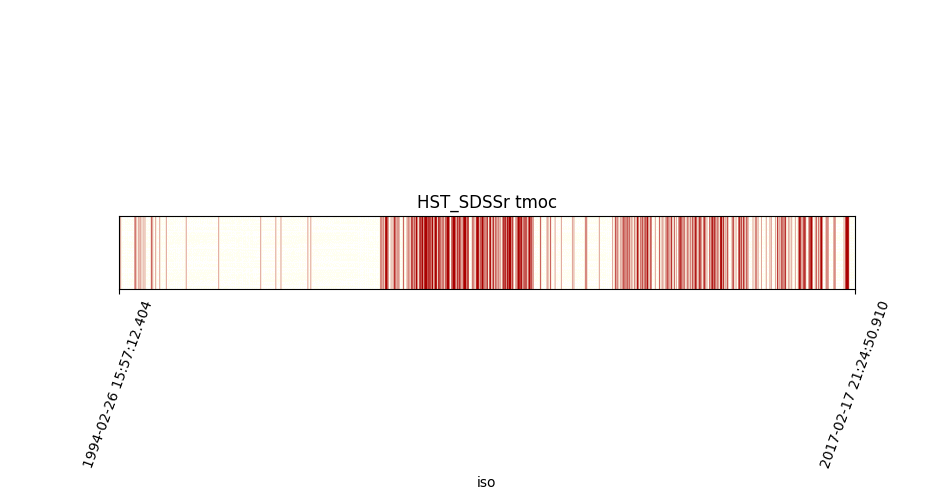

<IPython.core.display.Javascript object>


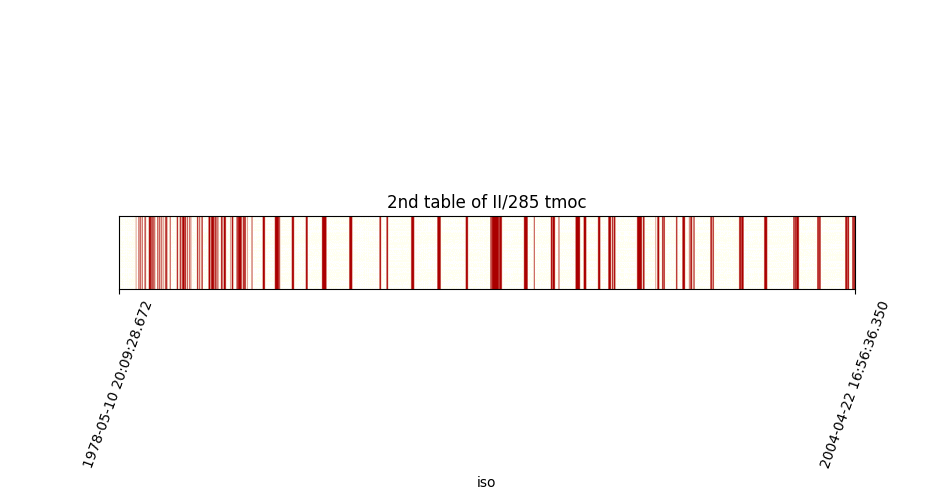

<IPython.core.display.Javascript object>


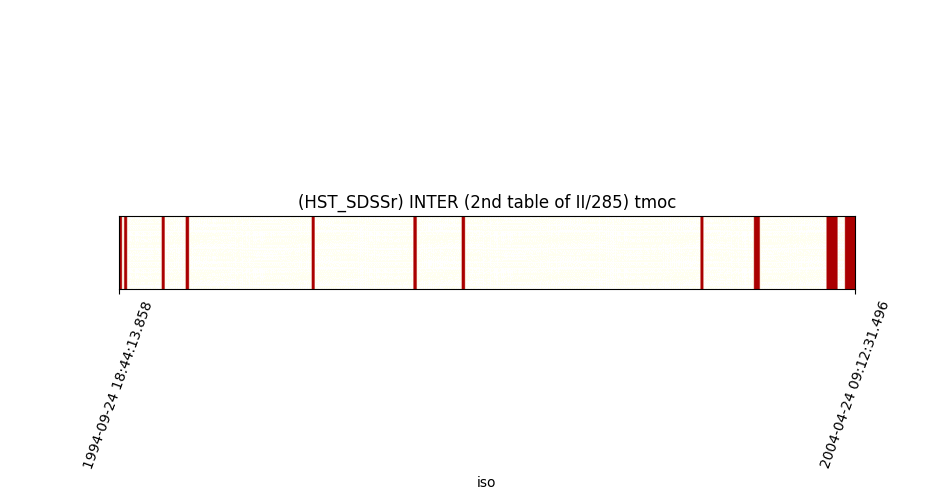

HST_SDSSr max order :  29
2nd table of II/285 max order :  14
(HST_SDSSr) INTER (2nd table of II/285) max order :  9


In [6]:
result = table_moc.intersection_with_timeresolution(
    time_moc, delta_t=TimeMOC.order_to_time_resolution(9)
)

time_moc.plot(title="HST_SDSSr tmoc")
table_moc.plot(title="2nd table of II/285 tmoc")
result.plot(title="(HST_SDSSr) INTER (2nd table of II/285) tmoc")

# print the max order of all the tmocs. Result tmoc must be of order 9
print("HST_SDSSr max order : ", time_moc.max_order)
print("2nd table of II/285 max order : ", table_moc.max_order)
print("(HST_SDSSr) INTER (2nd table of II/285) max order : ", result.max_order)

* #### Augment and Diminish a tmoc

<IPython.core.display.Javascript object>


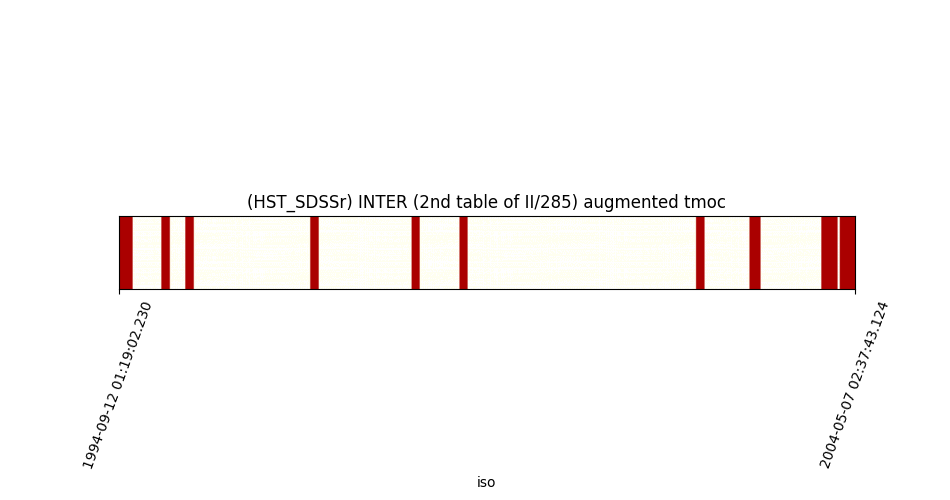

<IPython.core.display.Javascript object>


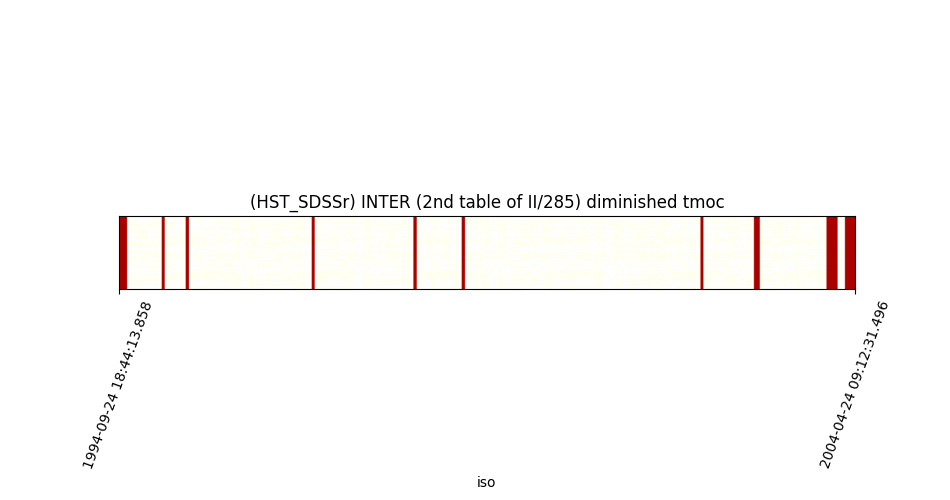

In [7]:
result.add_neighbours()
result.plot(title="(HST_SDSSr) INTER (2nd table of II/285) augmented tmoc")

result.remove_neighbours()
result.plot(title="(HST_SDSSr) INTER (2nd table of II/285) diminished tmoc")

* #### Complement of a TimeMoc

<IPython.core.display.Javascript object>


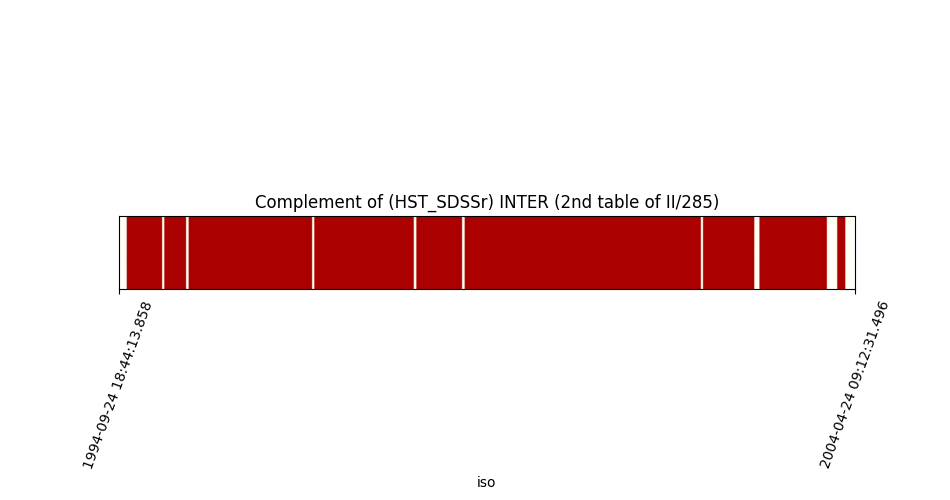

In [8]:
complemented_tmoc = result.complement()
complemented_tmoc.plot(
    title="Complement of (HST_SDSSr) INTER (2nd table of II/285)",
    view=(result.min_time, result.max_time),
)